In [14]:
### IMPORTING IMPORTANT LIBRARIES FOR DATA MANIPULATION , VISUALIZATIONS , NUMERCIAL COMPUTATION
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [7]:
##Load the weather dataset from a CSV file
##Convert the 'Formatted Date' column to datetime format for time-based analysis
df=pd.read_csv('/cleaned_weather_data.csv',parse_dates=['Formatted Date'])

In [3]:
df.sample(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day
447,2006-04-26 13:00:00+00:00,Mostly Cloudy,rain,23.977778,23.977778,0.44,9.2897,136.0,11.2056,0.0,1014.86,Mostly cloudy starting overnight continuing un...,2006.0,4.0,26.0
908,2006-08-16 18:00:00+00:00,Mostly Cloudy,rain,22.572222,22.572222,0.58,10.6421,118.0,10.3523,0.0,1012.52,Partly cloudy throughout the day.,2006.0,8.0,16.0
11789,2007-01-14 04:00:00+00:00,Clear,rain,2.227778,2.227778,0.85,4.5885,220.0,9.9820,0.0,1024.38,Partly cloudy starting in the morning continui...,2007.0,1.0,14.0
8747,2006-09-08 09:00:00+00:00,Partly Cloudy,rain,24.611111,24.611111,0.59,9.5473,266.0,11.1573,0.0,1015.72,Partly cloudy starting overnight and breezy in...,2006.0,9.0,8.0
6637,2006-11-11 13:00:00+00:00,Mostly Cloudy,rain,8.911111,5.983333,0.54,20.3504,198.0,9.9820,0.0,1025.53,Mostly cloudy starting overnight.,2006.0,11.0,11.0
345,2006-04-22 07:00:00+00:00,Mostly Cloudy,rain,12.388889,12.388889,0.98,3.4293,349.0,6.2951,0.0,1017.72,Foggy starting overnight continuing until morn...,2006.0,4.0,22.0
2704,2006-02-28 15:00:00+00:00,Overcast,snow,-2.777778,-7.900000,0.72,15.4238,36.0,10.0625,0.0,1008.91,Foggy overnight.,2006.0,2.0,28.0
8215,2006-09-15 05:00:00+00:00,Mostly Cloudy,rain,16.938889,16.938889,0.56,15.4077,108.0,9.9820,0.0,1015.61,Mostly cloudy starting overnight continuing un...,2006.0,9.0,15.0
9137,2007-04-22 15:00:00+00:00,Partly Cloudy,rain,17.933333,17.933333,0.24,11.2861,26.0,15.3111,0.0,1024.72,Partly cloudy until evening.,2007.0,4.0,22.0
3710,2006-07-12 12:00:00+00:00,Partly Cloudy,rain,30.983333,30.033333,0.33,7.9373,29.0,10.3523,0.0,1019.16,Partly cloudy until night.,2006.0,7.0,12.0


<ipython-input-10-6105334d9624>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean(numeric_only=True)['Temperature (C)'].plot(color='darkorange', linewidth=2)


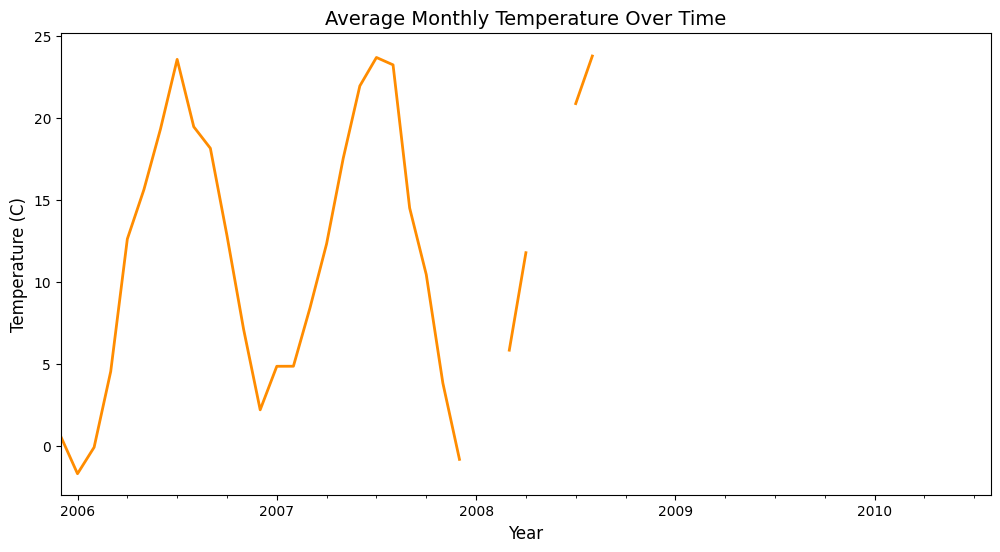

In [10]:
## Create a figure with a specified size
plt.figure(figsize=(12, 6))
##Resample the dataset to get the **monthly average temperature**
# 'M' represents monthly resampling, and mean() calculates the average temperature for each month
df.resample('M').mean(numeric_only=True)['Temperature (C)'].plot(color='darkorange', linewidth=2)
## # Add a title to the plot
plt.title('Average Monthly Temperature Over Time', fontsize=14)
### Label the x-axis as "Year"
plt.xlabel('Year', fontsize=12)

# Label the y-axis as "Temperature (C)"
plt.ylabel('Temperature (C)', fontsize=12)
# Display the plot
plt.show()


<ipython-input-16-2a737e3c3194>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette=custom_palette)


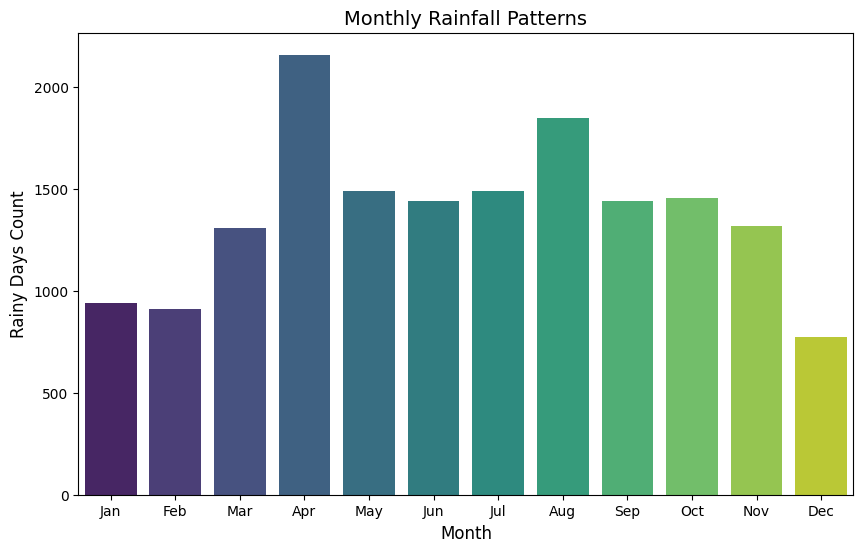

In [16]:
### Filter the dataset to include only rows where 'Precip Type' is 'rain'
# Group the data by 'Month' and count the number of rainy days in each month
monthly_rainfall = df[df['Precip Type'] == 'rain'].groupby("Month").size()
# Create a figure with a specified size
plt.figure(figsize=(10, 6))
custom_palette = "viridis"
###Create a bar plot showing the number of rainy days for each month
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette=custom_palette)
## Add a title to the plot
plt.title("Monthly Rainfall Patterns", fontsize=14)
# Label the x-axis as "Month"
plt.xlabel("Month", fontsize=12)
# Label the y-axis as "Rainy Days Count"
plt.ylabel("Rainy Days Count", fontsize=12)
# Set custom month labels on the x-axis
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<ipython-input-15-8de3512c53a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Temperature (C)'], palette=custom_palette)


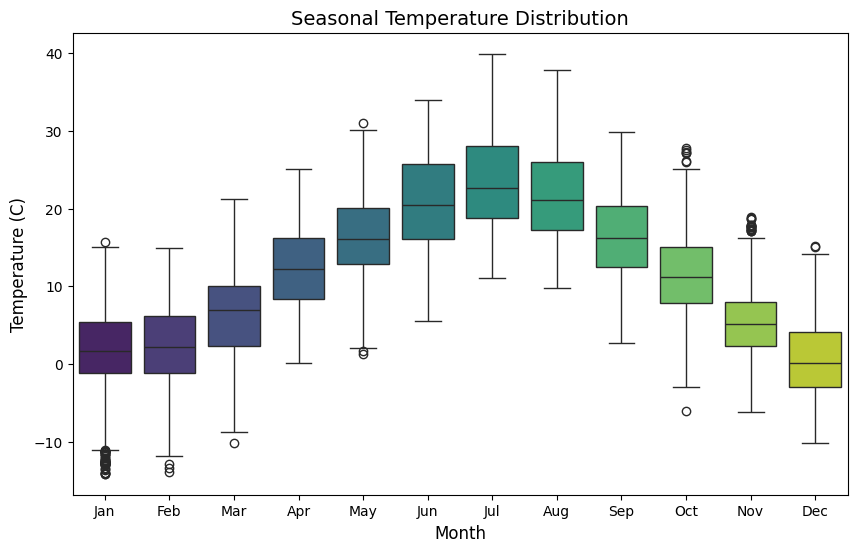

In [15]:
plt.figure(figsize=(10, 6))
# Create a box plot to show the distribution of temperature for each month
# The box plot helps visualize temperature variations, medians, and outliers
sns.boxplot(x=df['Month'], y=df['Temperature (C)'], palette=custom_palette)
# Add a title to the plot
plt.title("Seasonal Temperature Distribution", fontsize=14)
# Label the x-axis as "Month"
plt.xlabel("Month", fontsize=12)
# Label the y-axis as "Temperature (C)"
plt.ylabel("Temperature (C)", fontsize=12)
# Set custom labels for the x-axis (months from January to December)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()